<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In [1]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be some of the challenges you might encounter.

Also, this project aims to increase your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for multi-class classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)


%matplotlib inline

pd.set_option('display.max_columns', 150)
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [16]:
import sklearn

sklearn.__version__

'1.3.1'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [17]:
df_male =   pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")

In [18]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [19]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [20]:
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [21]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [22]:
print(df_male.shape), print(df_female.shape)

(4082, 108)
(1986, 108)


(None, None)

In [23]:
#we use concat to concatenate two DataFrames 
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df.head() 

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [24]:
df.shape

(6068, 108)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [26]:
#checking if there are any missing values (null values) in our DataFrame
df.isnull().sum().any()

True

In [27]:
#checking for duplicate rows in our DataFrame
df.duplicated().sum()

0

In [28]:
print(df.isna().sum().to_string())

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [29]:
drop_list =[]
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        drop_list.append(columns)
        
        #drops NaN values
        
        df = df.drop(columns='Ethnicity', axis=1)

Ethnicity = 4647


In [31]:
drop_list

['Ethnicity']

In [32]:
df.isnull().sum().any()

False

In [33]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [34]:
df[["DODRace","SubjectNumericRace"]]

DODRace  SubjectNumericRace
0           1                   1
1           1                   1
2           2                   2
3           1                   1
4           2                   2
...       ...                 ...
6063        3                   3
6064        3                   3
6065        2                   2
6066        3                   3
6067        3                   3

[6068 rows x 2 columns]

In [35]:
df.shape

(6068, 107)

In [36]:
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [37]:
df.shape

(5769, 107)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64


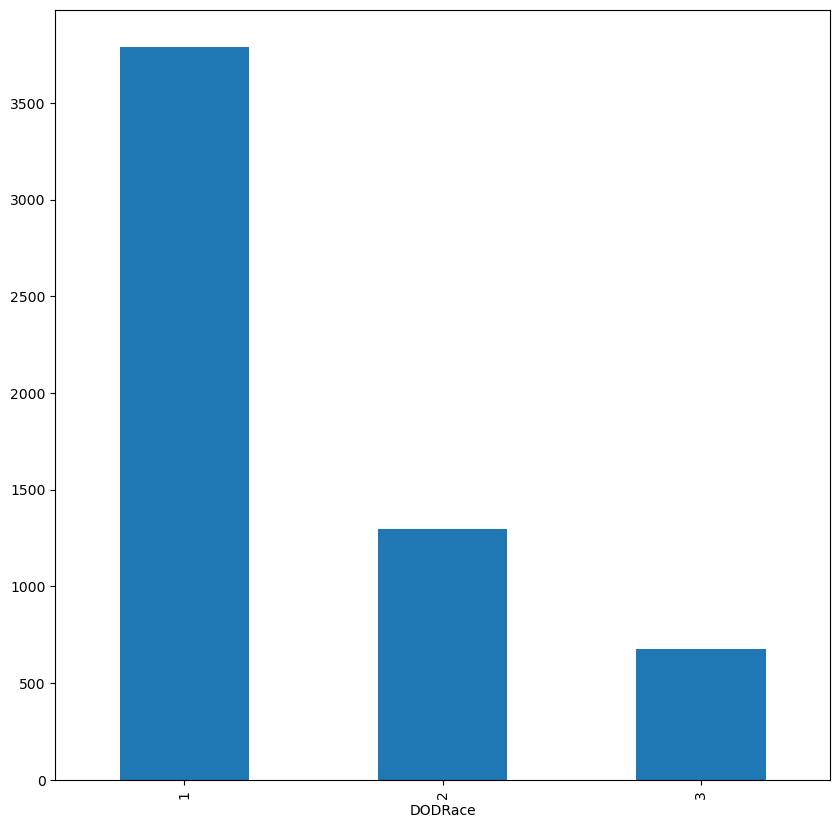

In [38]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="bar",figsize=(10,10));

In [39]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')


In [40]:
# Detect categorical columns by checking their data types
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Find unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_columns}

# Print the unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {len(values)}")

Unique values for column 'Gender': 2
Unique values for column 'Date': 253
Unique values for column 'Installation': 12
Unique values for column 'Component': 3
Unique values for column 'Branch': 3
Unique values for column 'PrimaryMOS': 281
Unique values for column 'SubjectsBirthLocation': 136
Unique values for column 'WritingPreference': 3


In [41]:
df.SubjectsBirthLocation.value_counts()

SubjectsBirthLocation
California       417
New York         411
Texas            386
Indiana          264
Florida          210
                ... 
Belarus            1
New Zealand        1
South America      1
Guatemala          1
Denmark            1
Name: count, Length: 136, dtype: int64

In [42]:
np.mean(df.SubjectsBirthLocation.value_counts())

42.419117647058826

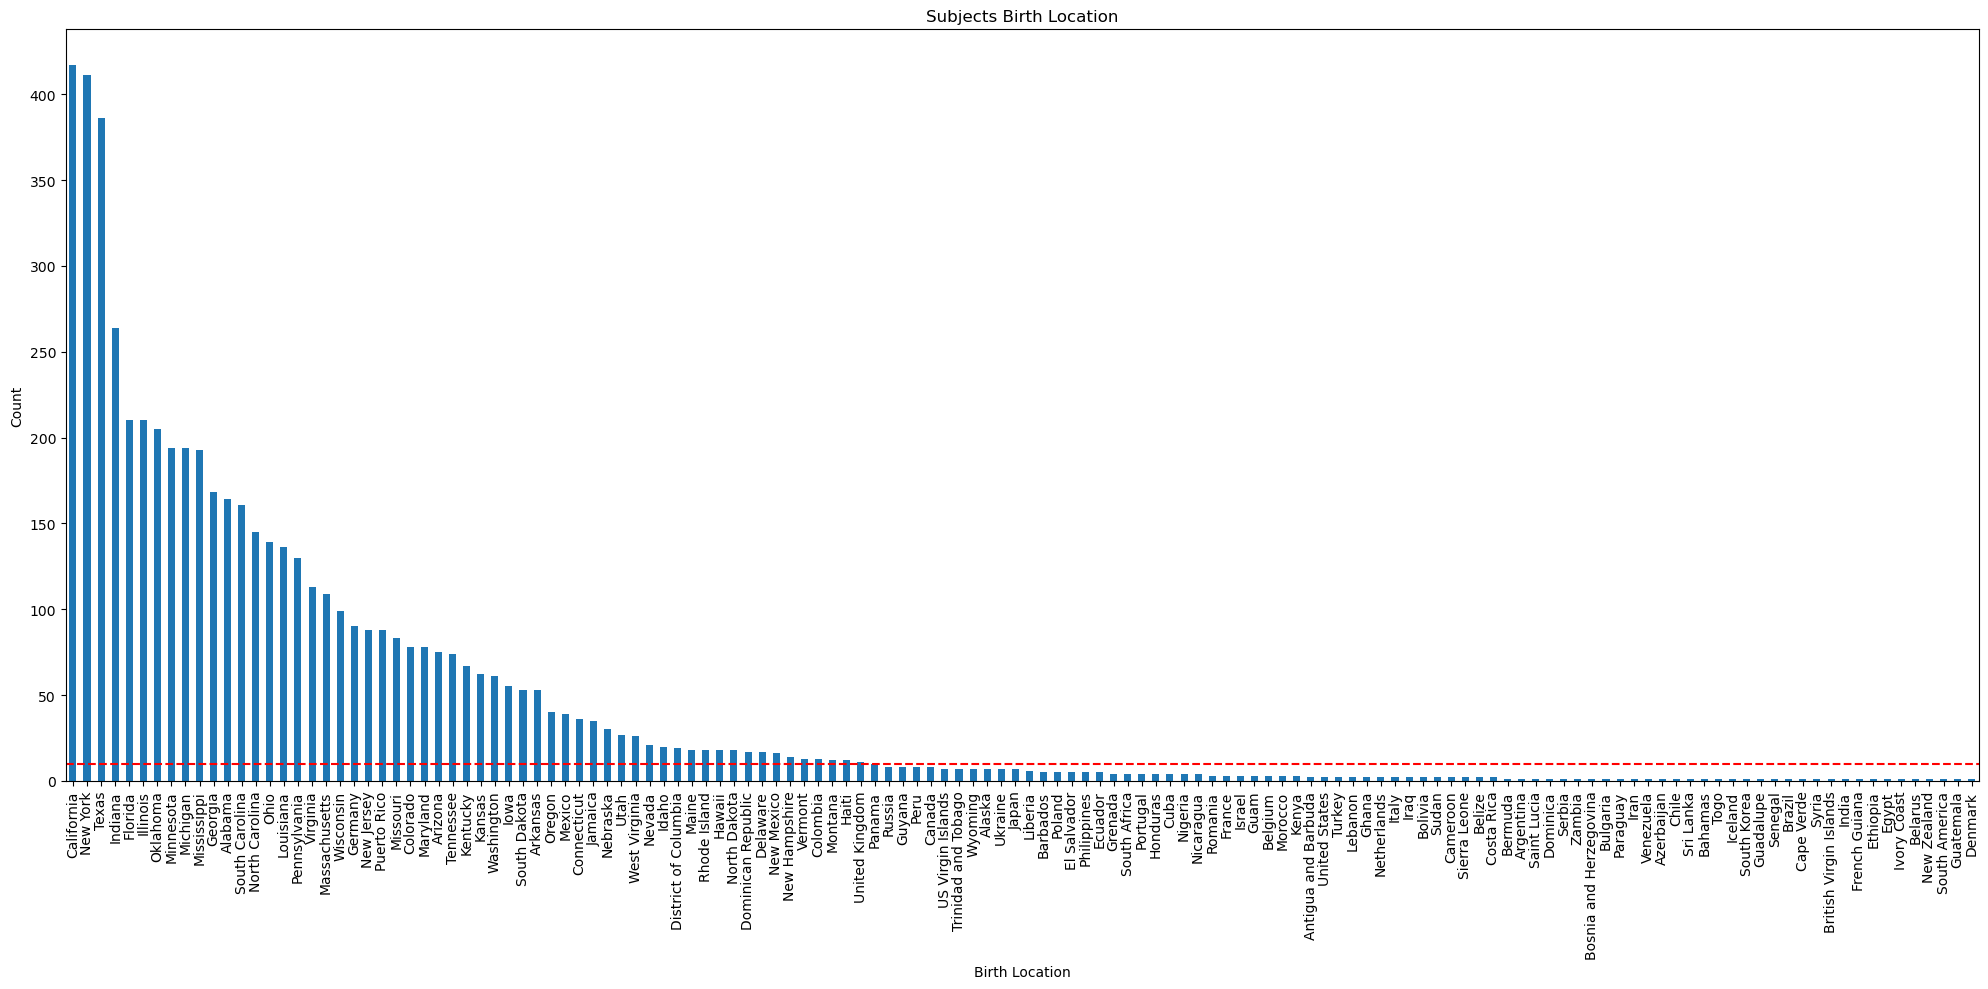

In [43]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--') 
plt.tight_layout();

In [44]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [45]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [27]:
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

# We tired this but it didn't work well.
# df["SubjectsBirthLocation"] = [states_by_region[i] if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
# df["SubjectsBirthLocation"].value_counts()

California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 54
South America       

In [47]:
df["SubjectsBirthLocation"].nunique()

57

In [48]:
df.DODRace.unique()

array([1, 2, 3])

In [49]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [50]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace 
Army National Guard  White      0.712
                     Black      0.191
                     Hispanic   0.097
Army Reserve         White      0.551
                     Black      0.251
                     Hispanic   0.198
Regular Army         White      0.617
                     Black      0.253
                     Hispanic   0.130
Name: proportion, dtype: float64

<Axes: ylabel='Component,DODRace'>

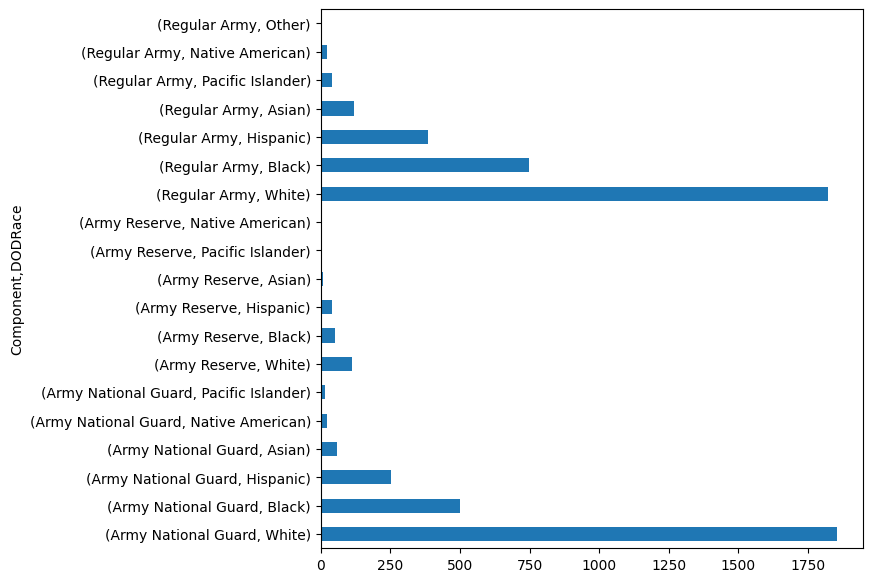

In [32]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [51]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White      0.803
                                             Black      0.102
                                             Hispanic   0.095
                     Combat Service Support  White      0.669
                                             Black      0.228
                                             Hispanic   0.104
                     Combat Support          White      0.685
                                             Black      0.235
                                             Hispanic   0.080
Army Reserve         Combat Arms             White      0.833
                                             Hispanic   0.167
                     Combat Service Support  White      0.603
                                             Hispanic   0.221
                                             Black      0.176
                     Combat Support          Black      0.431
                

In [52]:
ct = pd.crosstab( df.Component,df.DODRace, margins=True, margins_name="Total", normalize='index')
ct

DODRace              Black  Hispanic  White
Component                                  
Army National Guard  0.191     0.097  0.712
Army Reserve         0.251     0.198  0.551
Regular Army         0.253     0.130  0.617
Total                0.225     0.118  0.657

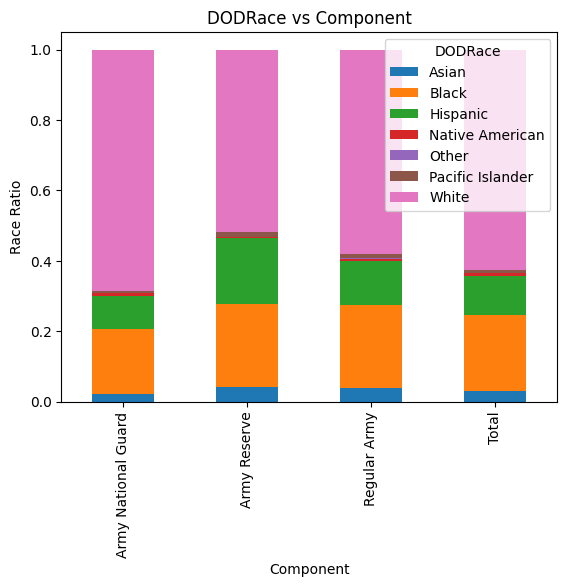

In [64]:
ct.plot(kind='bar', stacked=True)
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Race Ratio')
plt.show()

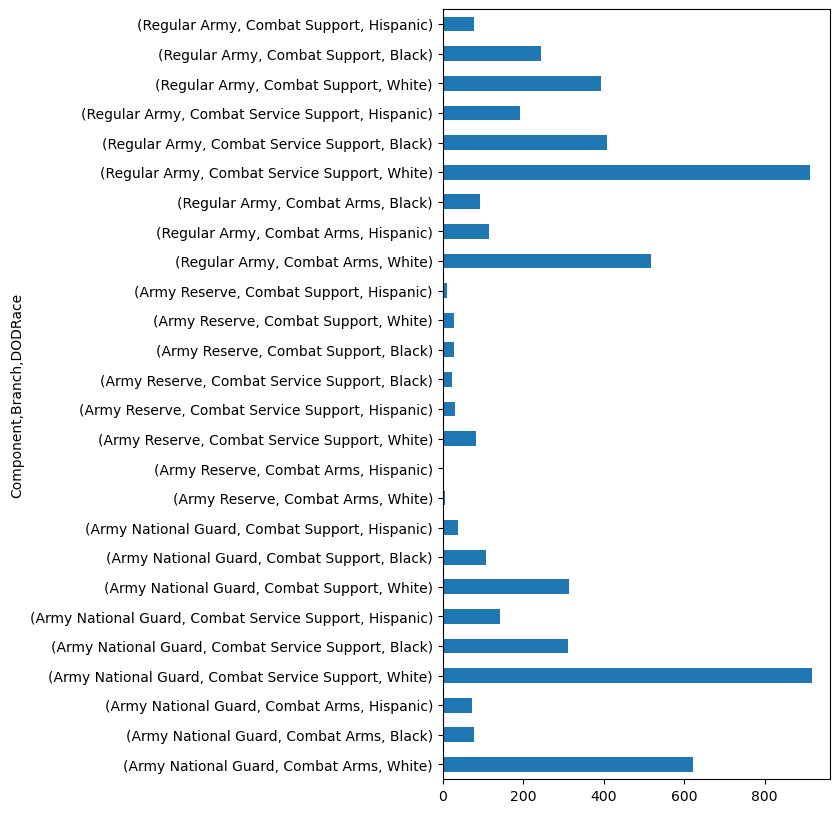

In [53]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(5, 10)
);

In [54]:
ct = pd.crosstab( df.DODRace, [df.Component, df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component Army National Guard                                        \
Branch            Combat Arms Combat Service Support Combat Support   
DODRace                                                               
Black                   0.102                  0.228          0.235   
Hispanic                0.095                  0.104          0.080   
White                   0.803                  0.669          0.685   

Component Army Reserve                                       Regular Army  \
Branch     Combat Arms Combat Service Support Combat Support  Combat Arms   
DODRace                                                                     
Black            0.000                  0.176          0.431        0.129   
Hispanic         0.167                  0.221          0.154        0.157   
White            0.833                  0.603          0.415        0.713   

Component                                       Total  
Branch    Combat Service Support Combat Support        
DODRace                                                
Black                      0.270          0.341 0.225  
Hispanic                   0.127          0.109 0.118  
White                      0.602          0.550 0.657

In [55]:
df.SubjectNumericRace.value_counts()

SubjectNumericRace
1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: count, dtype: int64

In [56]:
drop_list2 = [
   
    
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
   "subjectid",
    "SubjectNumericRace",
    "Date",
    "Component",
     "Installation"
   
]

df.drop(columns=drop_list2, inplace=True)



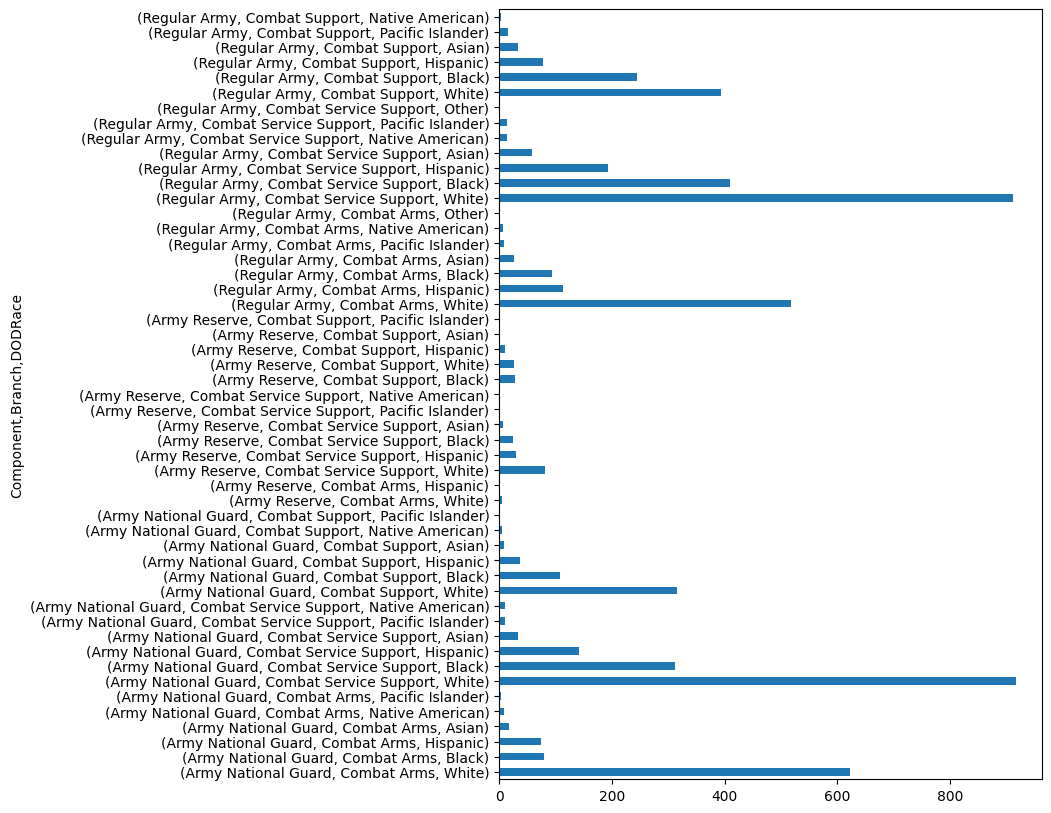

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(7, 10)
);

In [ ]:
df.SubjectNumericRace.value_counts()

# a feature describing our target DODRace.
# We will drop it as it will cause data leakage.

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
drop_list2 = [
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
    "subjectid",
    "SubjectNumericRace",
]

df.drop(columns=drop_list2, inplace=True)

# height and weight information is measured and included in the data
# as a separate feature.
# Since subjectid is the unique registration number of the soldiers,
# it will cause leakage.

In [57]:
df.shape

(5769, 98)

In [58]:
df.DODRace.value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [59]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   
2                             359          40         61             23   
3                             341          39         66             25   
4                             382          32         56             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizonta

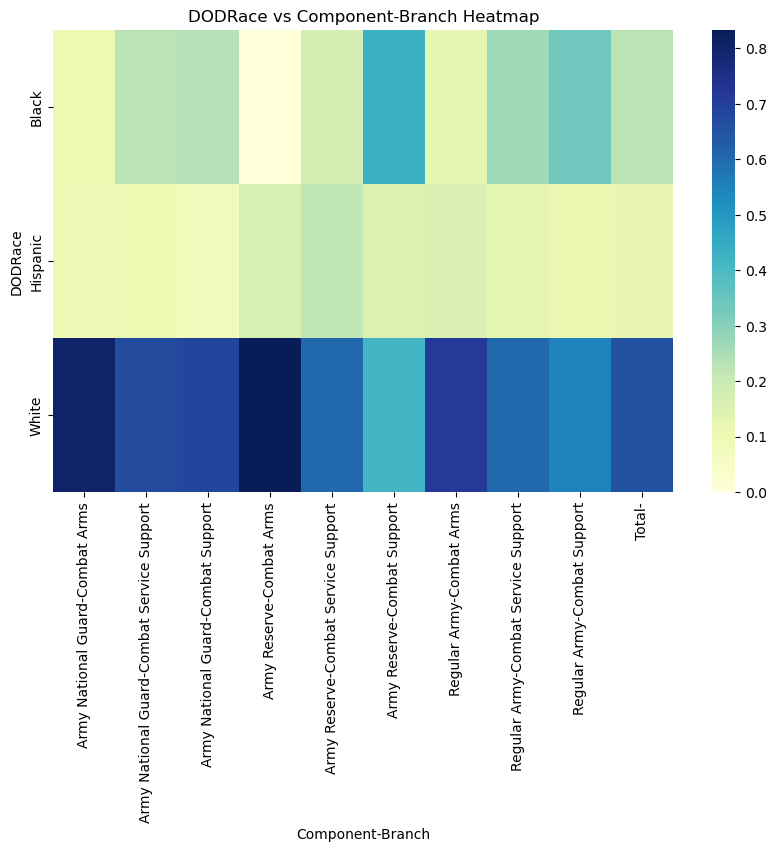

In [60]:
# Seaborn
sns.heatmap(ct, annot=False, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('DODRace vs Component-Branch Heatmap')
plt.show()

In [61]:
df2 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  319                        291                 142   
1                  344                        320                 135   
2                  345                        330                 135   
3                  328                        309                 143   
4                  340                        310                 138   
...                ...                        ...                 ...   
6063               306                        282                 136   
6064               309            

In [68]:
df2.reset_index(drop=True, inplace=True)

In [69]:
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
5764                             285            1392                    335   
5765                             262            1324                    301   
5766                             260            1334                    318   
5767                             205            1293                    302   
5768                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
5764                 223          1297                      252   
5765                 202          1204                      236   
5766                 213          1259                      234   
5767                 199          1207                      213   
5768                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
5764               196                368                        299   
5765               181                378                        294   
5766               183                363                        332   
5767               163                376                        276   
5768               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
5764               312               477                  72   
5765               287               468                  66   
5766               299               460                  70   
5767               280               426                  62   
5768               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  319                        291                 142   
1                  344                        320                 135   
2                  345                        330                 135   
3                  328                        309                 143   
4                  340                        310                 138   
...                ...                        ...                 ...   
5764               306                        282                 136   
5765               309            

In [70]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [71]:
# Apply the custom formatting function to each row
styled_df = df2.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the formatted DataFrame
styled_df

# From the dataframe below, we conclude that there are some outliers based on feature statsitics but not many

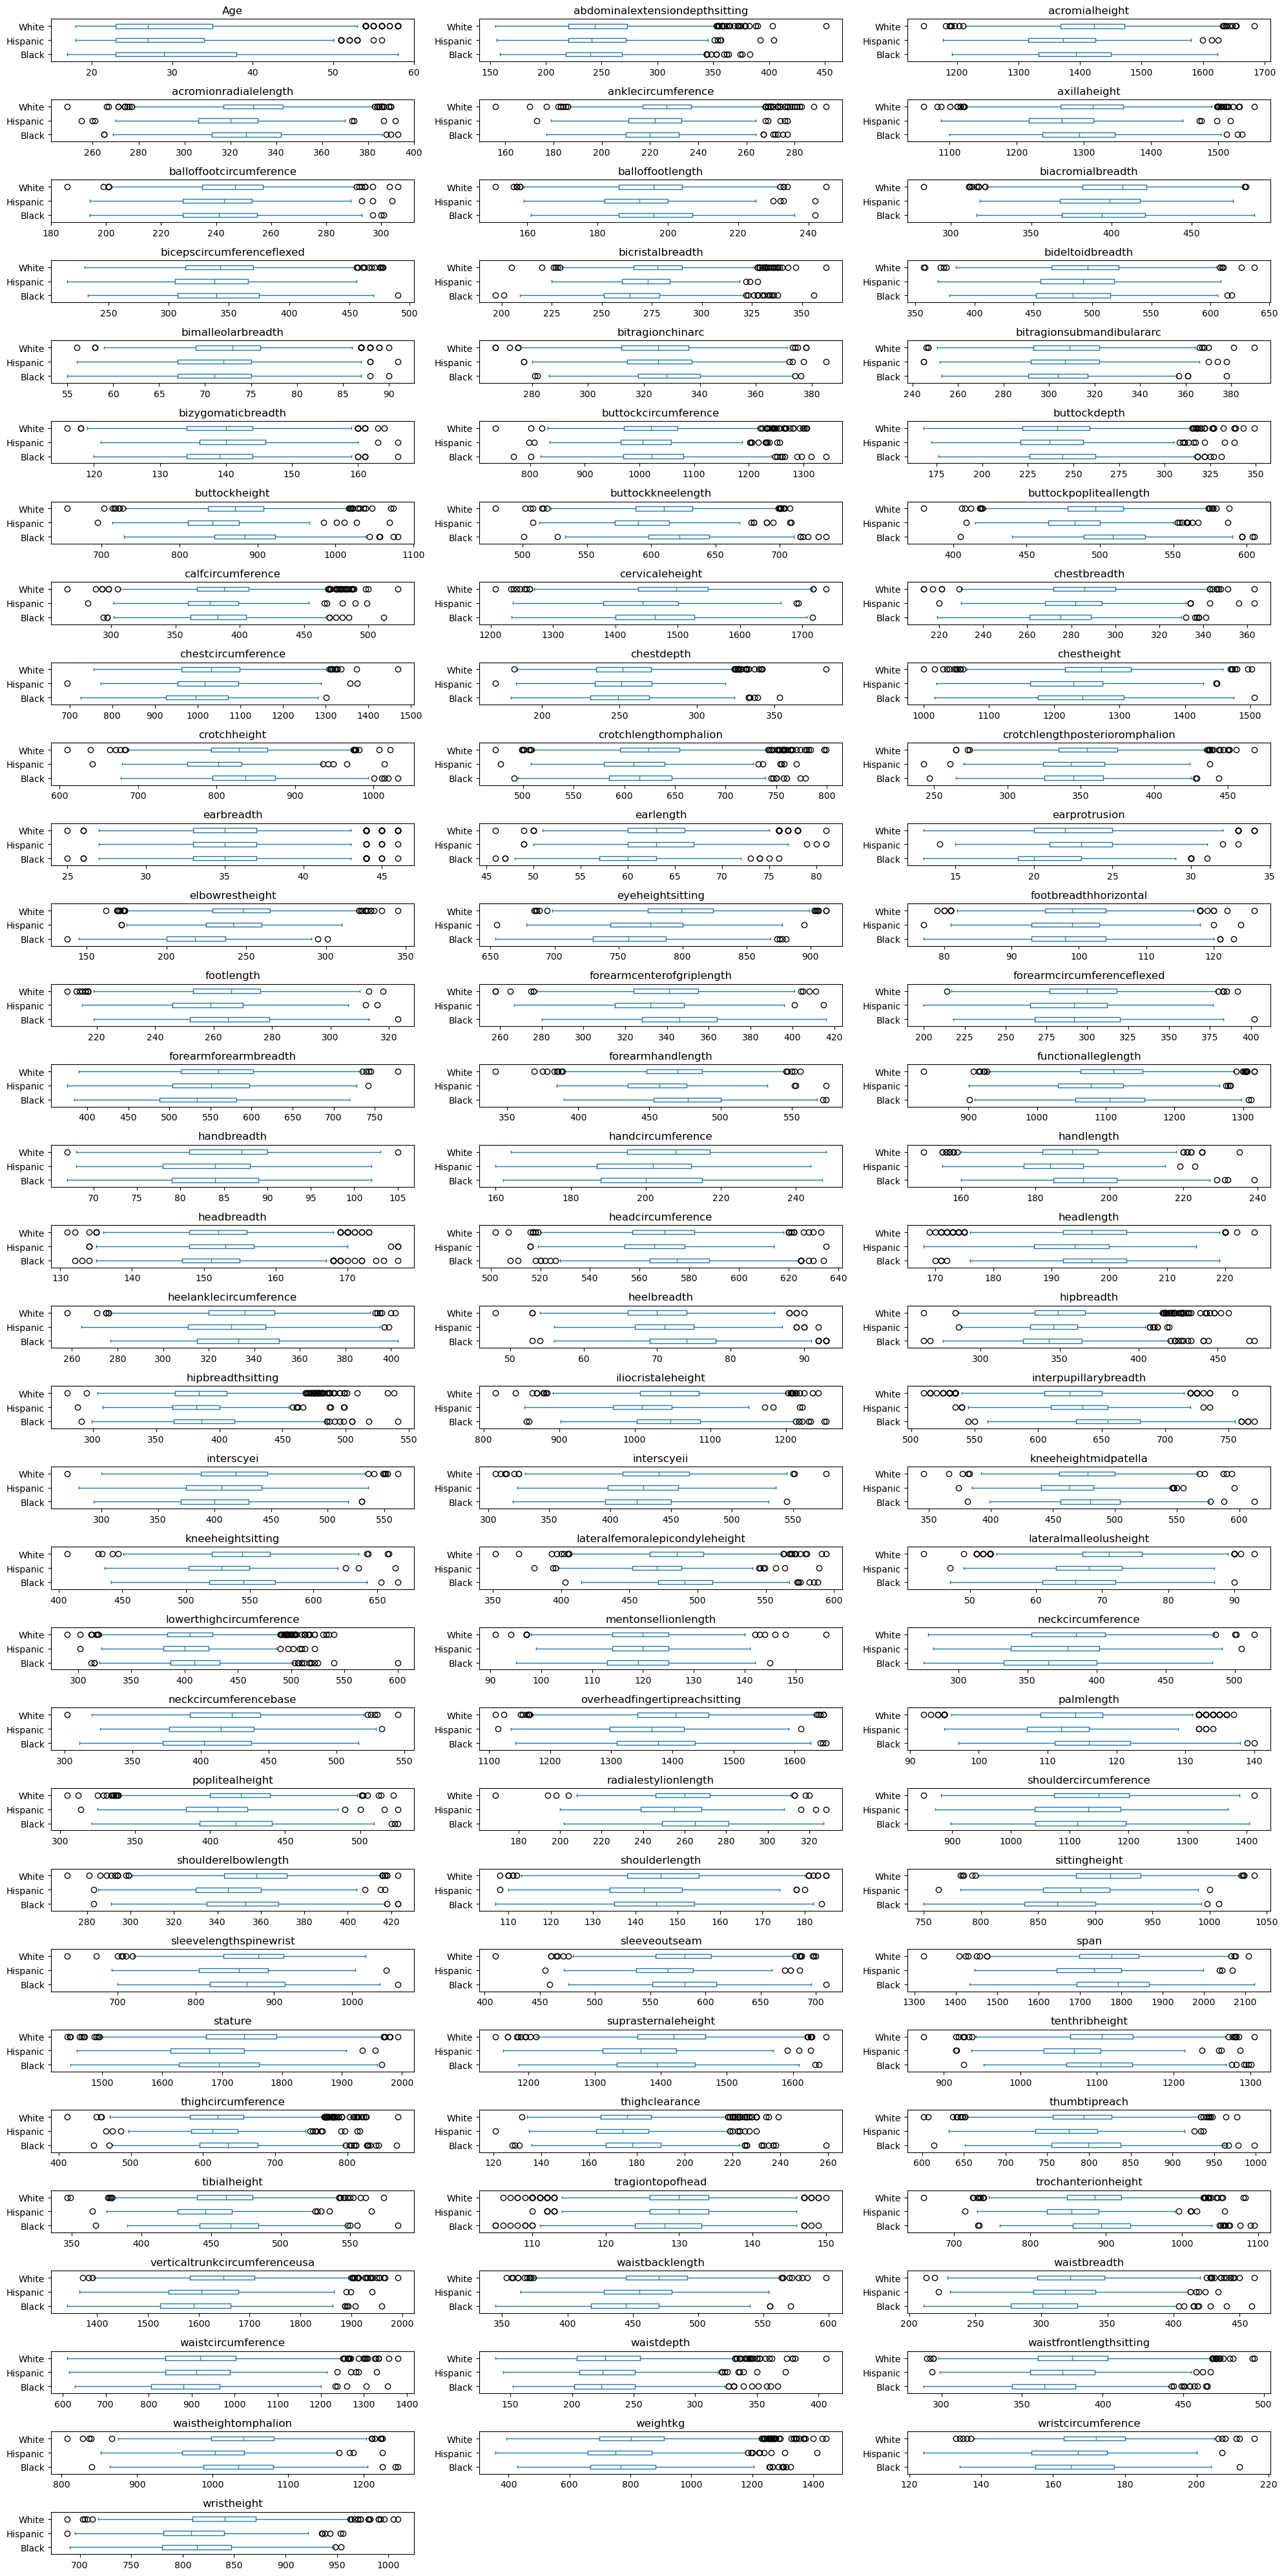

In [72]:
df2.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();
# We confirmed that what we found out in basic statistics of dataframe
# We don't have many outliers in the data to effect the standart deviation
# Since mean and standard deviation are not very close to each other.
# Another important point to note is that we need to look at outliers in terms of target classes.
# For example, for the age feature black class has no outliers.

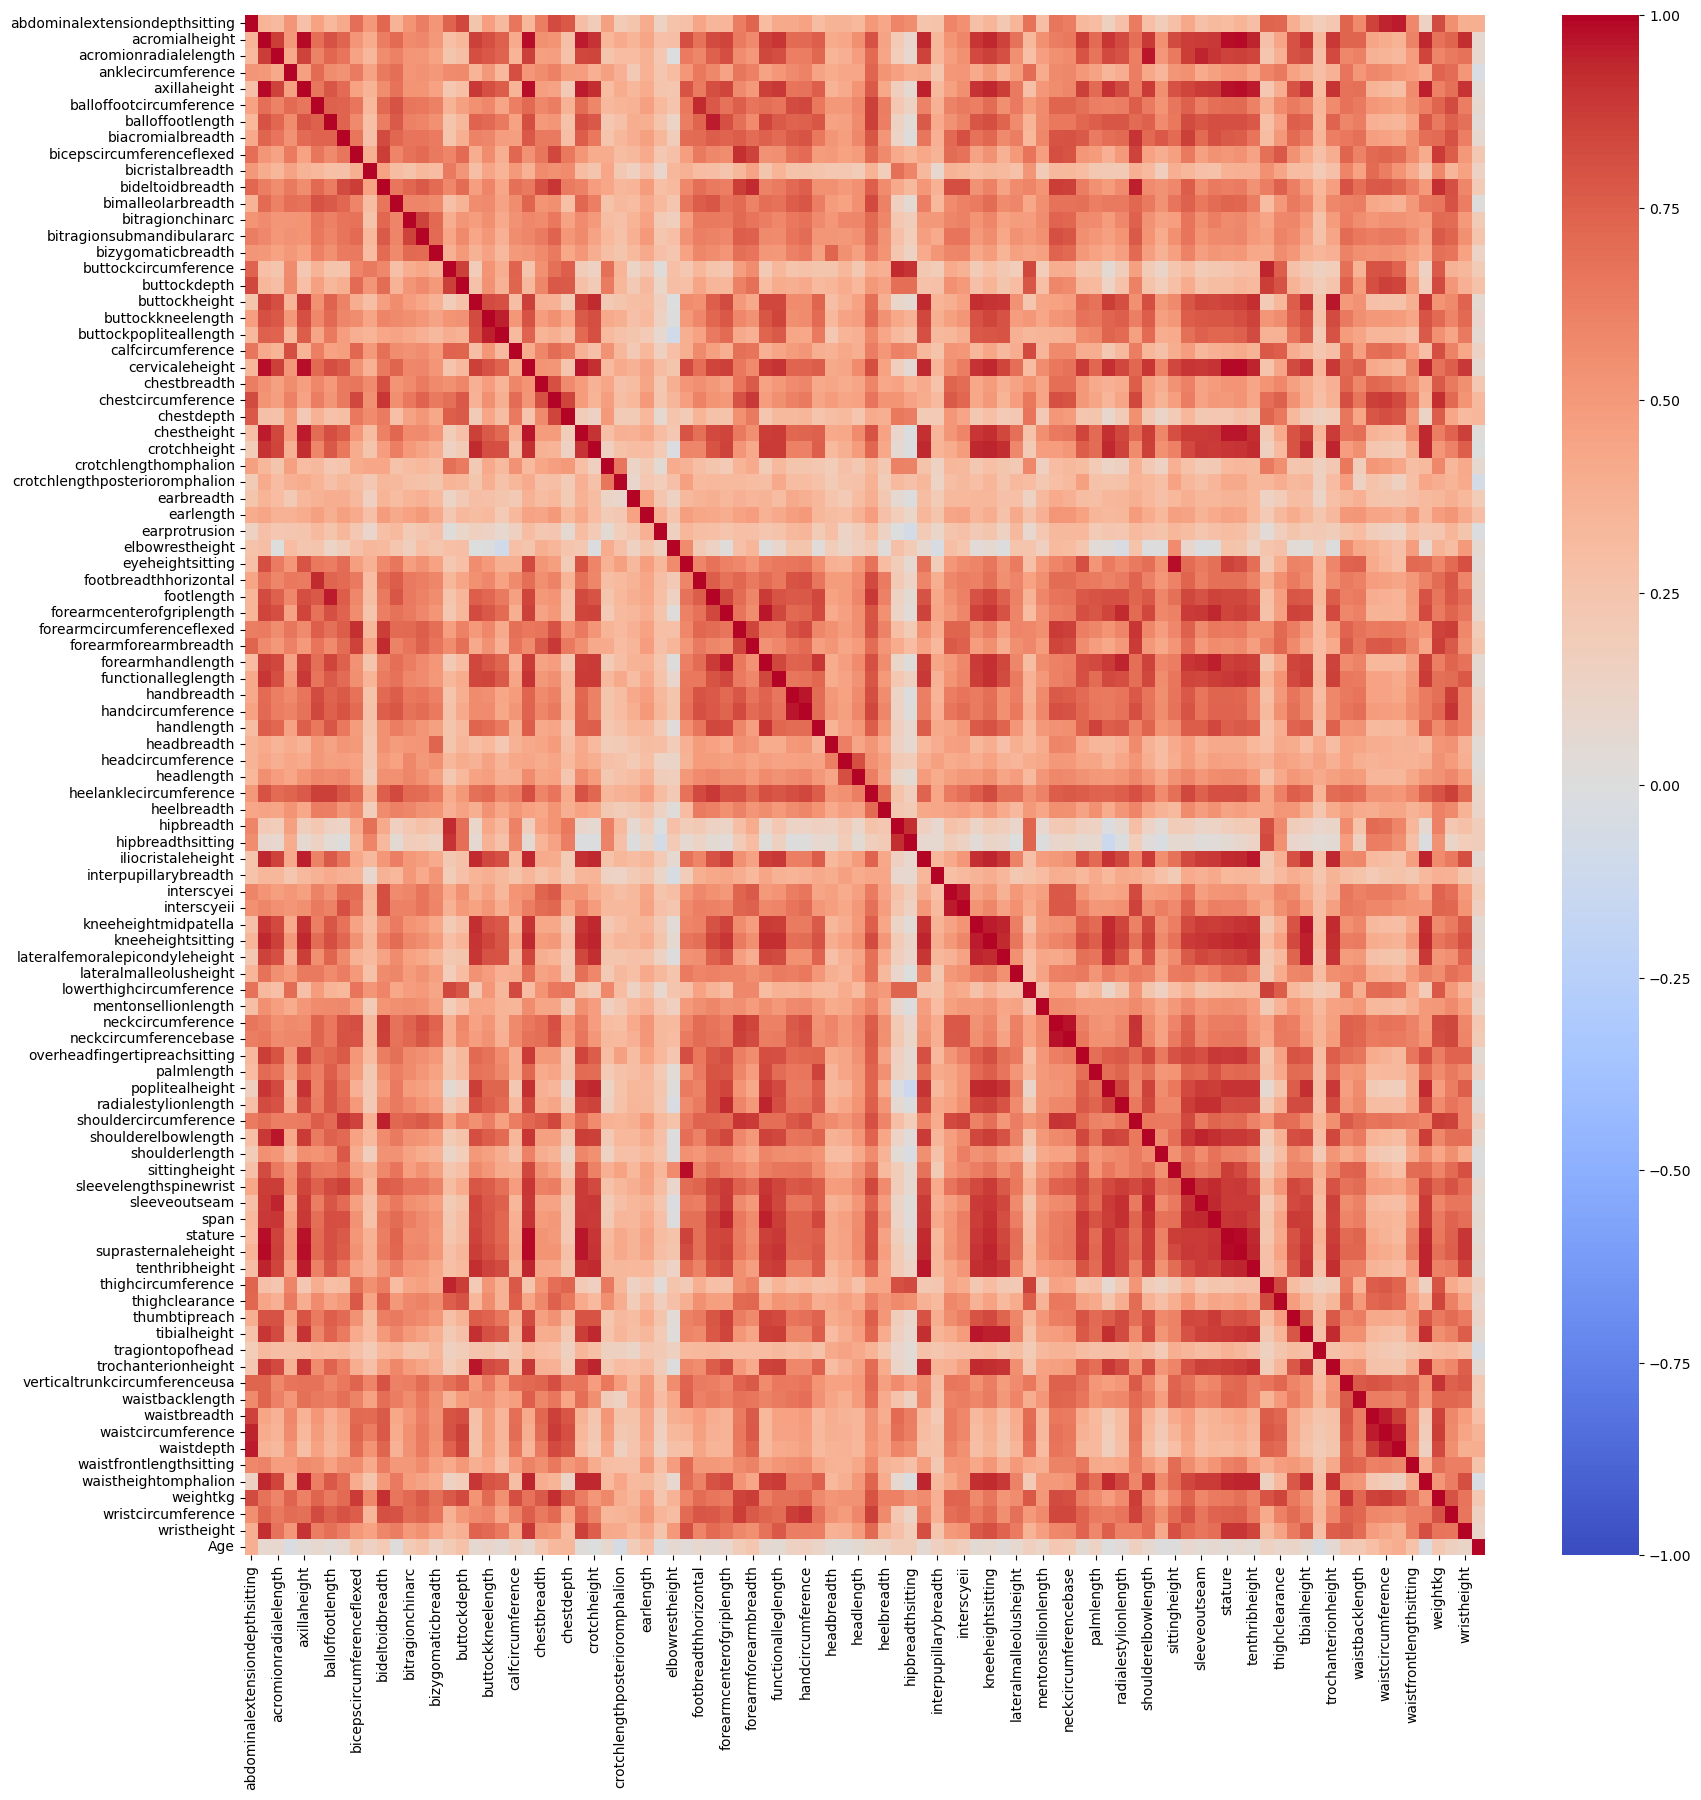

In [74]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [75]:
X = df2.drop(columns=["DODRace"])
y = df2.DODRace

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [77]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [78]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [79]:
cat = X_train.select_dtypes("object").columns
cat   #selecting the columns in the DataFrame X_train that have the data type "object" and assigning them to the variable cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [80]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [81]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [82]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  54  360 2620]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [83]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [84]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.481
train_precision_Hispanic   0.522
test_recall_Hispanic       0.772
train_recall_Hispanic      0.828
test_f1_Hispanic           0.592
train_f1_Hispanic          0.640
dtype: float64

### Logistic Model GridsearchCV

In [85]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"]) #calculating recall for the "Hispanic" 

In [86]:
param_grid = { # param_grid is a dictionary specifying the hyperparameters to search over
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [87]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [88]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [89]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [90]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.772
mean_train_score   0.828
Name: 7, dtype: object

In [91]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  54  360 2620]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



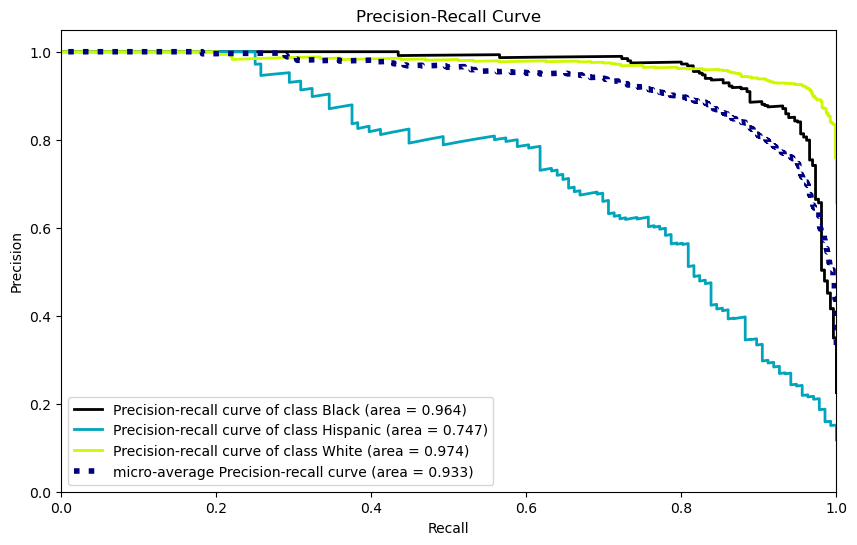

In [92]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [93]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.7467129121984186

In [94]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## Logistic Regression solver "liblenear" for small dataset

In [100]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)



In [101]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[239   6  15]
 [  5  96  35]
 [ 20  34 704]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.71      0.71      0.71       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 956   34   48]
 [  33  387  123]
 [  43  145 2846]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.68      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.86      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [102]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.652
train_precision_Hispanic   0.681
test_recall_Hispanic       0.655
train_recall_Hispanic      0.704
test_f1_Hispanic           0.652
train_f1_Hispanic          0.692
dtype: float64

## 2. SVC

### Vanilla SVC model

In [103]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [104]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [105]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.457
train_precision_Hispanic   0.503
test_recall_Hispanic       0.759
train_recall_Hispanic      0.834
test_f1_Hispanic           0.569
train_f1_Hispanic          0.628
dtype: float64

###  SVC Model GridsearchCV

In [106]:
# param_grid is a dictionary specifying the hyperparameters to search over.
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]} 

In [107]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [108]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [109]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [110]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.759
mean_train_score   0.834
Name: 3, dtype: object

In [111]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



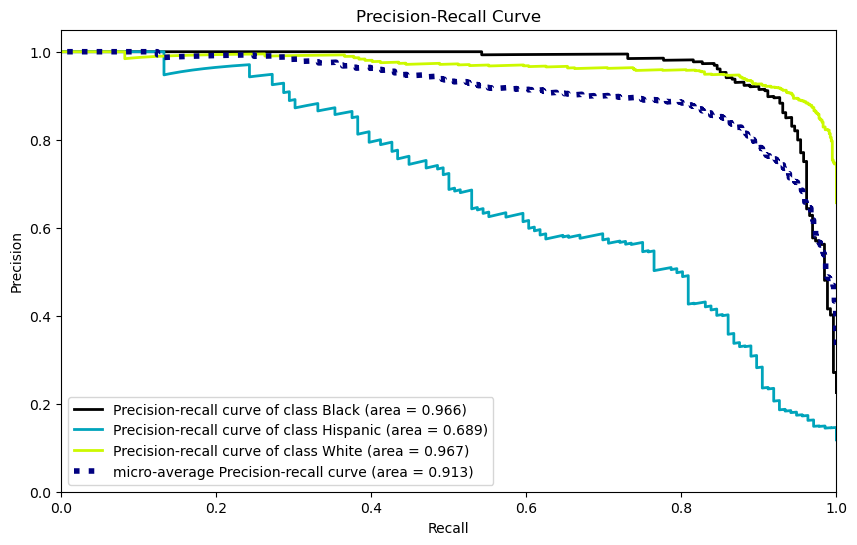

In [112]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [113]:
decision_function

array([[-0.25612844,  1.00325241,  2.25595185],
       [ 0.89195662, -0.2388124 ,  2.25012752],
       [-0.19592464,  1.09009966,  2.17116119],
       ...,
       [ 1.1045256 , -0.20686875,  2.18035493],
       [-0.153075  ,  1.10406805,  2.09443233],
       [-0.26099374,  1.16938286,  2.24008703]])

In [114]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [115]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6891283060889173

In [116]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [117]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [118]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [119]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [120]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[195   0  65]
 [  9   4 123]
 [ 14   2 742]]
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       260
    Hispanic       0.67      0.03      0.06       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.79      0.59      0.58      1154
weighted avg       0.80      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [121]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.867
train_precision_Hispanic   1.000
test_recall_Hispanic       0.028
train_recall_Hispanic      1.000
test_f1_Hispanic           0.053
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [122]:
param_grid = {  # param_grid is a dictionary specifying the hyperparameters to search over.
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    
}

In [123]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [124]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [125]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [126]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [127]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.610
mean_train_score   0.664
Name: 2, dtype: object

In [128]:
rf_grid_model.best_score_

0.6095820591233435

In [129]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  36  27]
 [ 17  77  42]
 [ 91 230 437]]
              precision    recall  f1-score   support

       Black       0.65      0.76      0.70       260
    Hispanic       0.22      0.57      0.32       136
       White       0.86      0.58      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.63      0.57      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 797  142   99]
 [  47  355  141]
 [ 241 1035 1758]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.62      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      4615



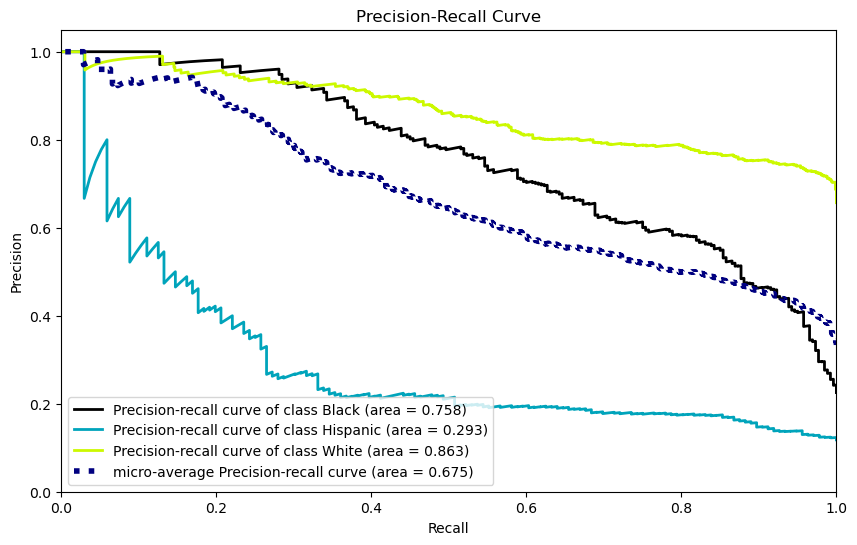

In [130]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [131]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2930735411262894

In [132]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [134]:
pip install xgboost   #installing xgboost

Note: you may need to restart the kernel to use updated packages.


In [137]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [138]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb) # sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [139]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   5  28]
 [ 14  56  66]
 [ 15  11 732]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       260
           1       0.78      0.41      0.54       136
           2       0.89      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [140]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [141]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
893     2.833      1
196     0.507      2
3821    0.507      2
3206    0.507      2
4500    1.482      0

In [142]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights
0      1.482      1038
1      2.833       543
2      0.507      3034
Name: count, dtype: int64

In [143]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [144]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[228   8  24]
 [ 13  65  58]
 [ 19  17 722]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       260
           1       0.72      0.48      0.58       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.83      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [145]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [146]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_

test_precision_Hispanic    0.755
train_precision_Hispanic   1.000
test_recall_Hispanic       0.499
train_recall_Hispanic      1.000
test_f1_Hispanic           0.599
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [230]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [233]:
operations_xgb = [
  ("OrdinalEncoder", column_trans),
   ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)




In [234]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_

/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atheer/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      col...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [235]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [236]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [237]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.589
mean_train_score   0.646
Name: 14, dtype: object

In [238]:
xgb_grid_model.best_score_

0.5893815834182807

In [240]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[204  30  26]
 [ 12  83  41]
 [107  96 555]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       260
           1       0.40      0.61      0.48       136
           2       0.89      0.73      0.80       758

    accuracy                           0.73      1154
   macro avg       0.64      0.71      0.66      1154
weighted avg       0.78      0.73      0.74      1154


Train_Set
[[ 802  121  115]
 [  60  343  140]
 [ 293  363 2378]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1038
           1       0.41      0.63      0.50       543
           2       0.90      0.78      0.84      3034

    accuracy                           0.76      4615
   macro avg       0.67      0.73      0.69      4615
weighted avg       0.80      0.76      0.78      4615



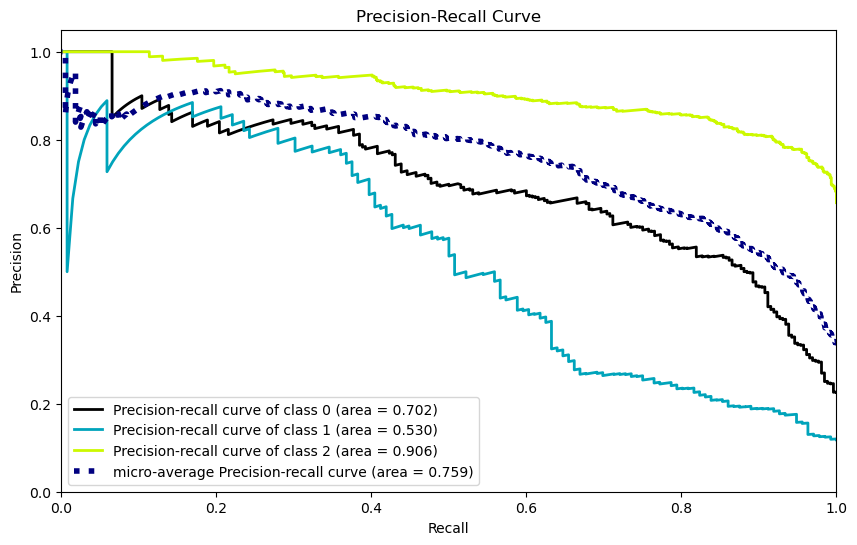

In [241]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [242]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [243]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.5297915059316113

In [245]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

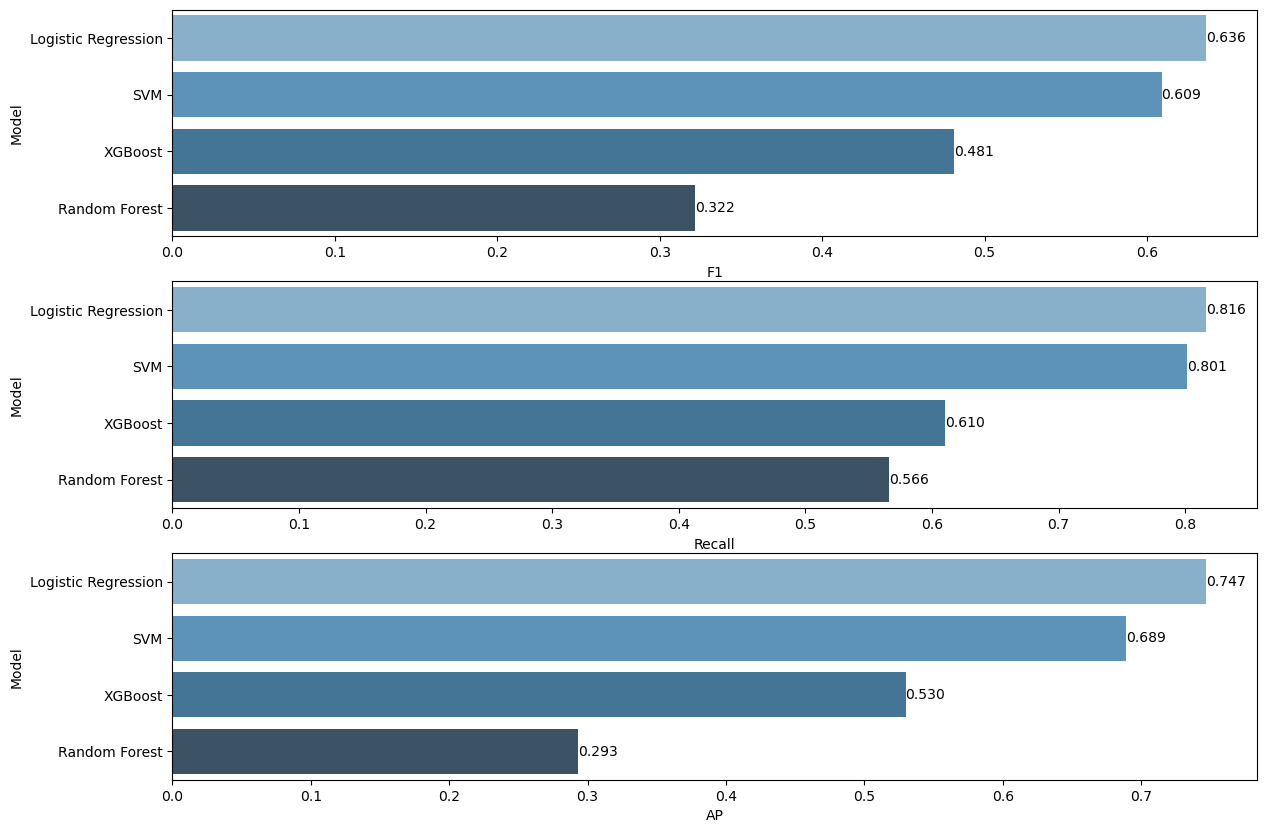

In [247]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [166]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [167]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [168]:
X[X.Gender == "Female"].describe()

# We will make predictions on the model based on the average
# values of all male soldiers in our data.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        1870.000        1870.000               1870.000   
mean                          230.168        1337.080                311.917   
std                            31.575          56.867                 16.756   
min                           155.000        1146.000                249.000   
25%                           208.000        1300.000                301.000   
50%                           227.000        1333.000                311.000   
75%                           250.000        1374.750                323.000   
max                           358.000        1536.000                371.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            1870.000      1870.000                 1870.000   
mean              216.050      1241.028                  228.233   
std                14.811        54.736                   11.719   
min               170.000      1062.000                  194.000   
25%               206.000      1204.000                  220.000   
50%               215.000      1237.000                  227.000   
75%               225.000      1278.000                  236.000   
max               274.000      1419.000                  267.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          1870.000           1870.000                   1870.000   
mean            182.378            365.724                    306.391   
std               9.464             18.224                     30.507   
min             151.000            283.000                    216.000   
25%             176.000            354.000                    285.000   
50%             182.000            366.000                    305.000   
75%             189.000            378.000                    324.000   
max             216.000            422.000                    435.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          1870.000          1870.000            1870.000   
mean            273.384           450.853              67.105   
std              22.346            28.468               3.473   
min             197.000           357.000              55.000   
25%             258.000           431.000              65.000   
50%             273.000           450.000              67.000   
75%             287.750           469.000              69.000   
max             362.000           558.000              83.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          1870.000                   1870.000            1870.000   
mean            311.006                    287.828             133.471   
std              14.204                     15.299               5.399   
min             267.000                    245.000             116.000   
25%             301.000                    277.000             130.000   
50%             311.000                    287.000             133.000   
75%             321.000                    297.000             137.000   
max             370.000                    378.000             150.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              1870.000      1870.000       1870.000           1870.000   
mean               1023.655       233.627        835.859            592.170   
std                  75.155        24.221         44.531             31.720   
min                 798.000       168.000        656.000            479.000   
25%                 972.250       216.000        806.000            571.000   
50%                1021.000       232.000        832.000            590.000   
75%                1071.000       249.000        865.000            611.000   
max                1341.000       349.000        995.000            709.000   

       buttockpopliteallength  calfcircumference  

In [172]:
female_mean_human = X[X.Gender == "Female"].describe(include="all").loc["mean"]
female_mean_human

abdominalextensiondepthsitting    230.168
acromialheight                   1337.080
acromionradialelength             311.917
anklecircumference                216.050
axillaheight                     1241.028
                                   ...   
wristheight                       794.997
Gender                                NaN
SubjectsBirthLocation                 NaN
Age                                28.951
WritingPreference                     NaN
Name: mean, Length: 97, dtype: object

In [173]:
female_mean_human["Gender"] = "Female"
female_mean_human["SubjectsBirthLocation"] = "California"
female_mean_human["WritingPreference"] = "Right hand"

In [175]:
pd.DataFrame(female_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                        230.168       1337.080               311.917   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean            216.050     1241.028                 228.233          182.378   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean           365.724                   306.391          273.384   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean          450.853             67.105          311.006   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                   287.828            133.471             1023.655   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean      233.627       835.859           592.170                486.511   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean           373.577        1397.656      269.567            948.541   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean    248.012    1173.495      784.296               621.757   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                        342.551     33.258    59.343        20.387   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean         231.650          747.856                92.704    246.704   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                   318.370                    264.665   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean               495.543           440.730            1046.428      78.256   

     handcircumference handlength headbreadth headcircumference headlength  \
mean           186.794    181.371     147.582           561.493    190.136   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                310.909      67.226    354.506           399.907   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean            997.824               617.077    373.951     396.297   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean              450.183           512.503                        466.993   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                 62.882                 401.256             113.174   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean           330.122               371.593                      1311.410   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean    108.887         389.167              241.918              1029.698   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean             334.996        135.549       856.712                808.274   

     sleeveoutseam     span  stature suprasternaleheight tenthribheight  \
mean       544.663 1663.372 1630.522            1331.776       1058.236   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean            617.847        168.267       745.089      438.886   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean          126.377             847.280                      1560.929   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean         425.487      300.268            862.135    213.568   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                 355.114              982.198  680.606            155.004   

     wristheight  Gender SubjectsBirthLocation    Age WritingPreference  
mean     794.997  Female            California 28.951        Right hand

In [176]:
final_model.predict(pd.DataFrame(female_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array(['Hispanic'], dtype=object)

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [177]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.7714885514629068

In [178]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7633856827778824

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [181]:
from imblearn.over_sampling import SMOTE   #Smote stands for Synthetic Minority Over-sampling Technique, used to address the class imbalance problem in classification. 

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

In [182]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [183]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [184]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [185]:
X_train_over.shape

(9102, 156)

In [186]:
y_train_over.value_counts()

DODRace
Hispanic    3034
White       3034
Black       3034
Name: count, dtype: int64

In [187]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [188]:
X_train_under.shape

(1629, 156)

In [189]:
y_train_under.value_counts()


DODRace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [190]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [191]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [192]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [193]:
y_resampled_over.value_counts()

# With over, we doubled the number of observations in the Hispanic class.
# But we need to check below whether this increase causes overfitting.

DODRace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [194]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [195]:
y_resampled_under.value_counts()
# We reduced the number of white observations by around 18% and equalized to 2500.

DODRace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [196]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [197]:
y_resampled.value_counts()

DODRace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [198]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [199]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [200]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]  # ("scaler", MinMaxScaler())

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [201]:
smote_pipeline = imbpipeline(steps=operations)

In [202]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [203]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[233   9  18]
 [  5  95  36]
 [ 17  38 703]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90       260
    Hispanic       0.67      0.70      0.68       136
       White       0.93      0.93      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 938   40   60]
 [  26  384  133]
 [  31  142 2861]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1038
    Hispanic       0.68      0.71      0.69       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [204]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.633
train_precision_Hispanic   0.675
test_recall_Hispanic       0.668
train_recall_Hispanic      0.705
test_f1_Hispanic           0.650
train_f1_Hispanic          0.689
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [206]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

# Since the Shap doesn't work with the model fitted with pipeline,
# we will apply the conversions manually.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [207]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[238  12  10]
 [  6 110  20]
 [ 28  85 645]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.89       260
    Hispanic       0.53      0.81      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 957   48   33]
 [  25  447   71]
 [  62  345 2627]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.53      0.82      0.65       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [208]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

# no overfitting.

test_precision_Hispanic    0.487
train_precision_Hispanic   0.534
test_recall_Hispanic       0.764
train_recall_Hispanic      0.831
test_f1_Hispanic           0.594
train_f1_Hispanic          0.650
dtype: float64

In [209]:
features = column_trans_shap.get_feature_names_out()
features

# Since we perform the transformation with the make_column_transform function,
# we will use this feature order within the Shap function since the feature
# order of the X_train_trans and X_test_trans data changes as follows.

array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Africa',
       'SubjectsBirthLocation_Alabama', 'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Arizona', 'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Asia', 'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Delaware',
       'SubjectsBirthLocation_District of Columbia',
       'SubjectsBirthLocation_Europe', 'SubjectsBirthLocation_Florida',
       'SubjectsBirthLocation_Georgia', 'SubjectsBirthLocation_Hawaii',
       'SubjectsBirthLocation_Idaho', 'SubjectsBirthLocation_Illinois',
       'SubjectsBirthLocation_Indiana', 'SubjectsBirthLocation_Iowa',
       'SubjectsBirthLocation_Kansas', 'SubjectsBirthLocation_Kentucky',
       'SubjectsBirthLocation_Louisiana', 'SubjectsBirthLocation_Maine',
       'SubjectsBirthLocation_Maryland',
       'SubjectsBirthLocation_Massachusetts',
       'Subj

## Shap values for test data

In [215]:
np.__version__

'1.24.3'

In [217]:
pip install shap  #installing shap, It provides a unified measure of feature importance and can be applied to a wide range of models, including tree-based models, linear models, support vector machines, and more.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.4/445.4 kB 655.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


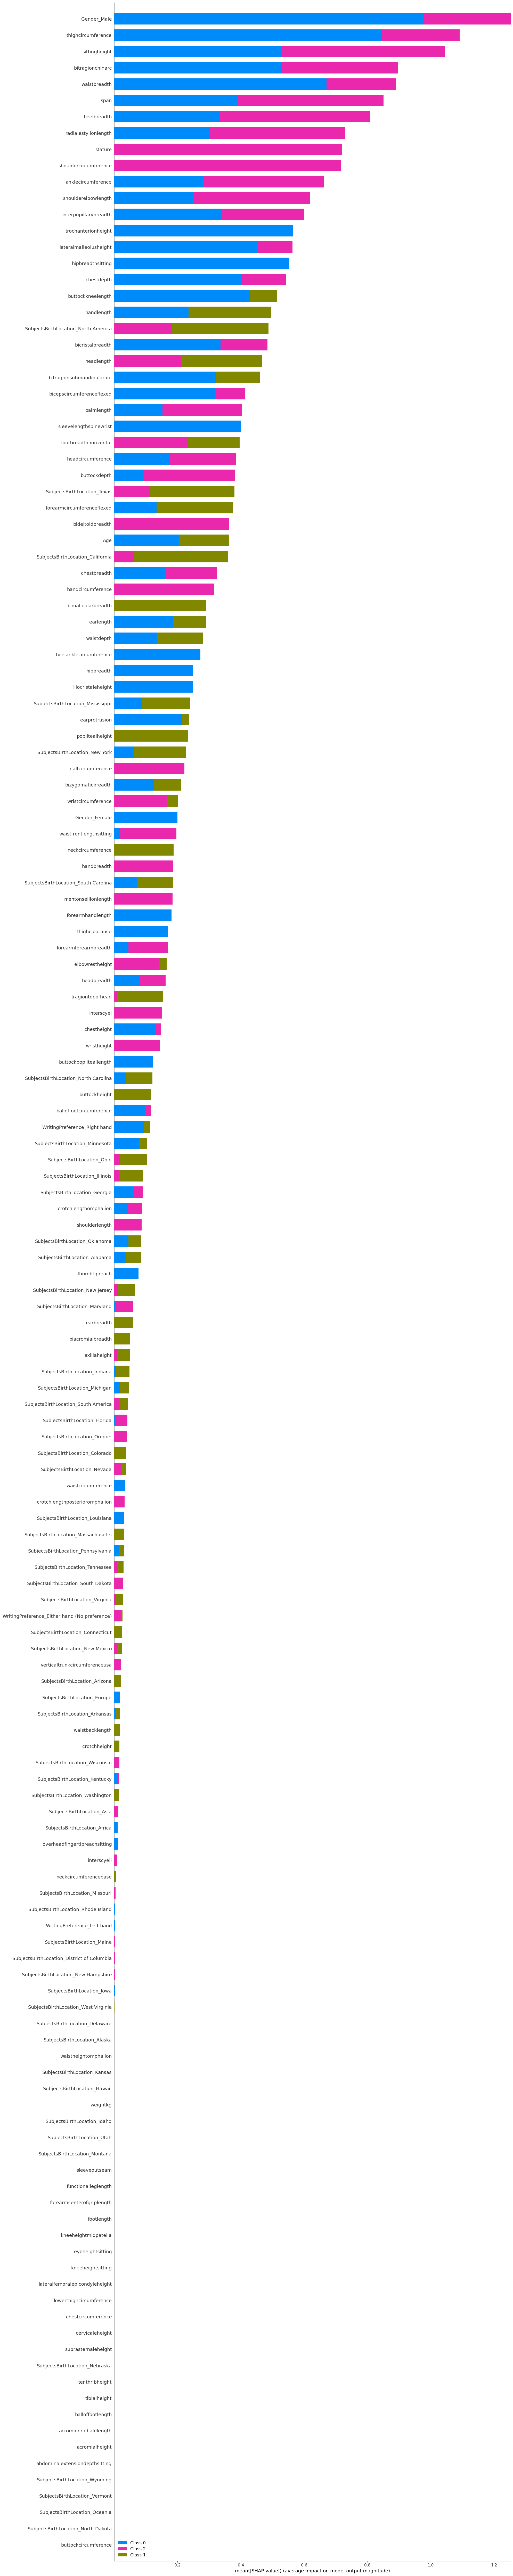

In [219]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)



## SHAP values for Feature Selection (train data)

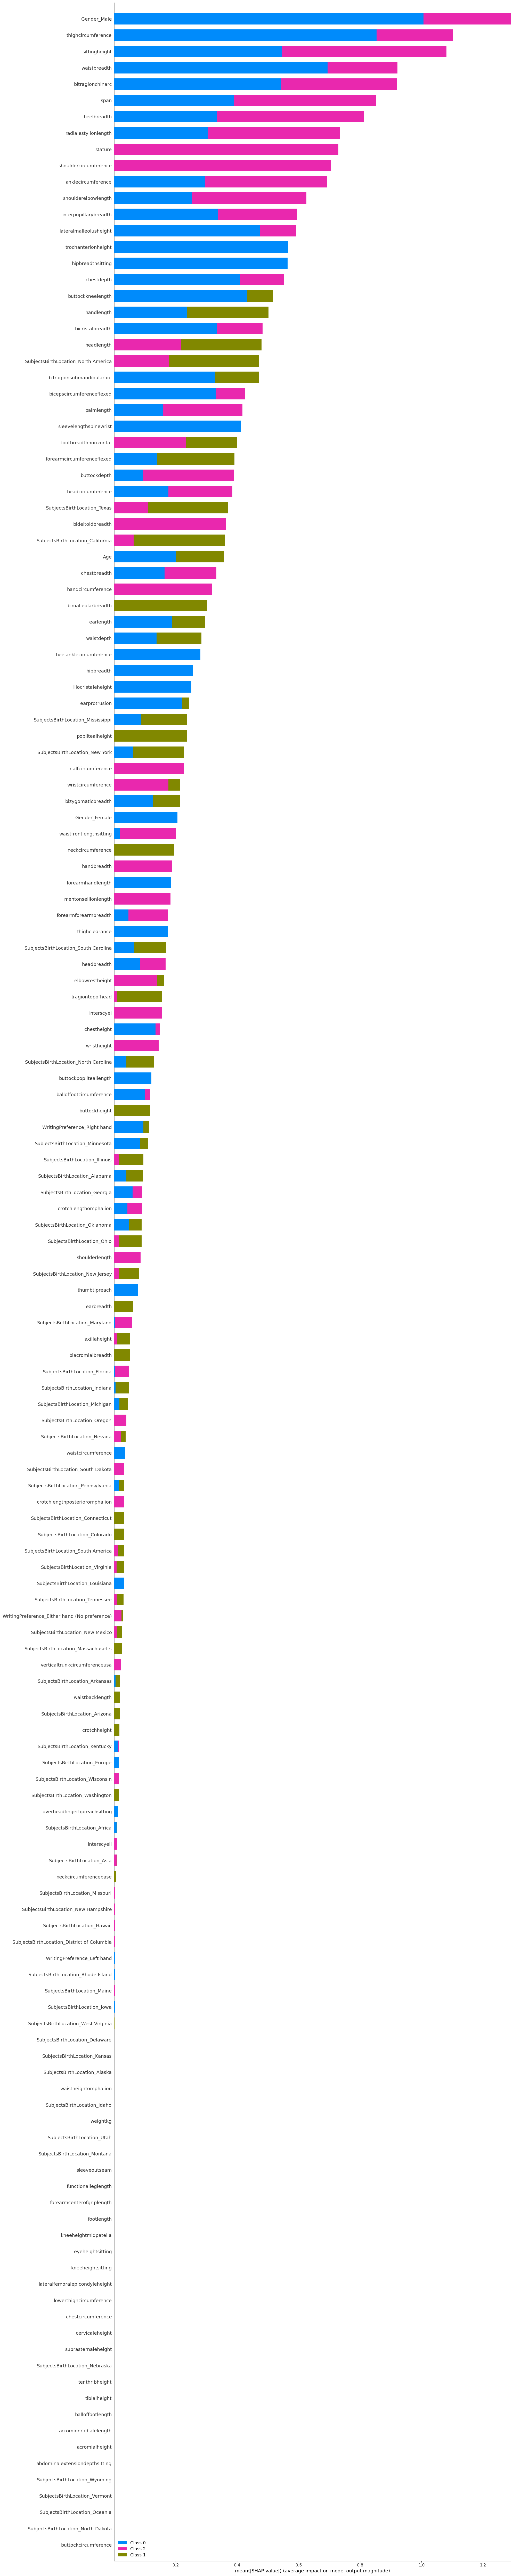

In [220]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# blues black, pink white and green hispanic
# as you can see, there is no feature that contributes to the prediction of hispanic among
# the top 13 most important features.
# We choose 19 features that contribute to the predictions of hispanics.

In [221]:
hispanic = [
    "SubjectsBirthLocation",
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [222]:
X2 = X[hispanic]
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength  \
0          North Dakota         193                         299         206   
1              New York         195                         289         201   
2              New York         203                         357         202   
3             Wisconsin         194                         318         199   
4        North Carolina         218                         324         197   

   bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  \
0                        291                    101                  71   
1                        320                     98                  67   
2                        330                    103                  75   
3                        309                    106                  73   
4                        310                    111                  80   

   poplitealheight  waistdepth WritingPreference  tragiontopofhead  \
0              437         240        Right hand               140   
1              417         225         Left hand               120   
2              431         255         Left hand               125   
3              393         205        Right hand               127   
4              523         214        Right hand               122   

   bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  \
0               493                    436                401            882   
1               479                    420                394            870   
2               544                    434                427            901   
3               518                    446                401            821   
4               524                    430                435           1080   

   buttockkneelength  earlength  axillaheight  Age  
0                619         71          1347   41  
1                584         62          1293   35  
2                623         61          1327   42  
3                560         66          1239   31  
4                706         56          1478   21

In [223]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [224]:
X2.shape

(5769, 19)

In [225]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y
)

In [226]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [227]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[204  21  35]
 [  8 107  21]
 [ 96 120 542]]
              precision    recall  f1-score   support

       Black       0.66      0.78      0.72       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.72      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.76      0.69      1154
weighted avg       0.80      0.74      0.75      1154


Train_Set
[[ 848   78  112]
 [  38  430   75]
 [ 352  498 2184]]
              precision    recall  f1-score   support

       Black       0.68      0.82      0.75      1038
    Hispanic       0.43      0.79      0.56       543
       White       0.92      0.72      0.81      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.81      0.75      0.76      4615



In [228]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.414
train_precision_Hispanic   0.428
test_recall_Hispanic       0.768
train_recall_Hispanic      0.793
test_f1_Hispanic           0.538
train_f1_Hispanic          0.556
dtype: float64

**both states and countries encoded**
- test_precision_Hispanic     0.383408
- train_precision_Hispanic    0.388484
- test_recall_Hispanic        0.694275
- train_recall_Hispanic       0.708571
- test_f1_Hispanic            0.493329
- train_f1_Hispanic           0.501797


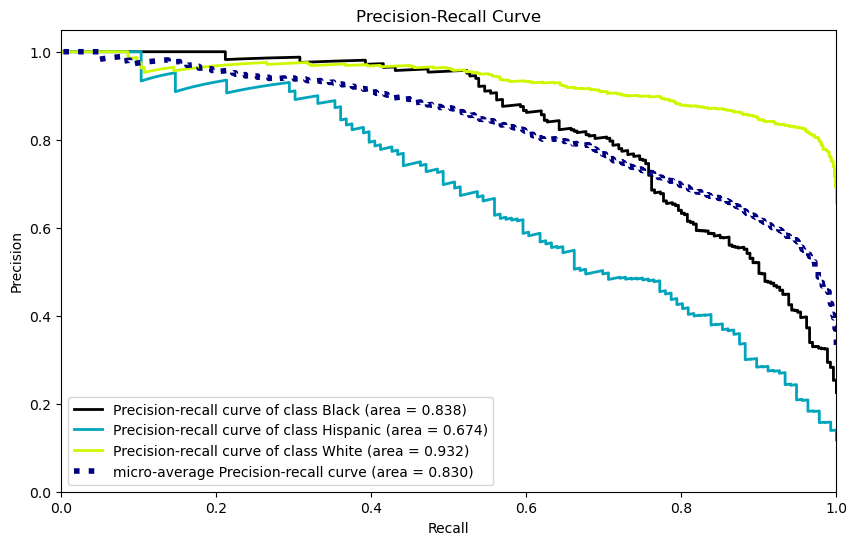

In [229]:
y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
